# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [135]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

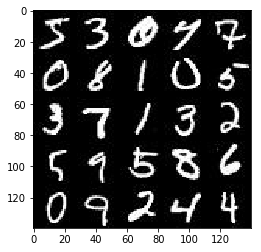

In [136]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

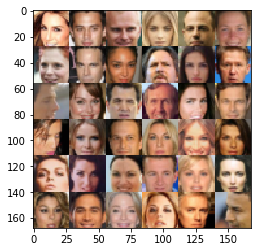

In [137]:
show_n_images = 36

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [138]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.4.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [139]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    #Real input images placeholder with rank 4 using image_width, image_height, and image_channels.
    inputs_real = tf.placeholder(tf.float32, 
                                  [None, image_width, image_height, image_channels], 
                                  name='input_real') 
    
    #Z input placeholder with rank 2 using z_dim.
    z_input = tf.placeholder(tf.float32, 
                               [None, z_dim], 
                               name='z_input')
    
    #Learning rate placeholder with rank 0.
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return inputs_real, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [163]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        l1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * l1, l1)
        
        l2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(l2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        l3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(l3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        #l4 = tf.layers.conv2d(relu2, 512, 5, strides=2, padding='same')
        #bn4 = tf.layers.batch_normalization(l4, training=True)
        #relu4 = tf.maximum(alpha * bn4, bn4)
        
        # Flatten it
        #flat = tf.reshape(relu4, (-1, 4*4*512))
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [164]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.2
    with tf.variable_scope('generator', reuse=not is_train):

        l1 = tf.layers.dense(z, 4*4*512)
        l1 = tf.reshape(l1, (-1, 4, 4, 512))
        l1 = tf.layers.batch_normalization(l1, training=is_train)
        l1 = tf.maximum(alpha * l1, l1)
        # 4x4x512 now
        
        l2 = tf.layers.conv2d_transpose(l1, 256, 4, strides=1, padding='valid')
        l2 = tf.layers.batch_normalization(l2, training=is_train)
        l2 = tf.maximum(alpha * l2, l2)
        # 7x7x256 now
        
        l3 = tf.layers.conv2d_transpose(l2, 128, 5, strides=2, padding='same')
        l3 = tf.layers.batch_normalization(l3, training=is_train)
        l3 = tf.maximum(alpha * l3, l3)
        # 14x14x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(l3, out_channel_dim, 5, strides=2, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [171]:


def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    smooth = 0.1

    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [172]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [173]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [181]:
import pickle as pkl
samples = []
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    total_data_size, image_width, image_height, image_channels = data_shape

    input_real, input_z, learning_rate_input = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    steps = 0
    print_every_step = 20
    show_every_step = 200
    losses = []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):

                steps += 1

                # Generate random noise
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                batch_images = batch_images*2 
                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, 
                                               learning_rate_input: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images,
                                               learning_rate_input: learning_rate})

                if steps % print_every_step == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    losses.append((train_loss_d, train_loss_g))
                    print("Epoch {}/{} Batch Step {}...".format(epoch_i, epoch_count, steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % show_every_step == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                
        print('Done Training!')
        show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
# Save training generator samples
with open('train_samples.pkl', 'wb') as f:
    pkl.dump(samples, f)


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2 Batch Step 20... Discriminator Loss: 2.8556... Generator Loss: 3.9079
Epoch 0/2 Batch Step 40... Discriminator Loss: 4.4997... Generator Loss: 0.0814
Epoch 0/2 Batch Step 60... Discriminator Loss: 1.6728... Generator Loss: 0.4973
Epoch 0/2 Batch Step 80... Discriminator Loss: 0.5992... Generator Loss: 1.8432
Epoch 0/2 Batch Step 100... Discriminator Loss: 0.8570... Generator Loss: 2.1590
Epoch 0/2 Batch Step 120... Discriminator Loss: 2.1019... Generator Loss: 0.2767
Epoch 0/2 Batch Step 140... Discriminator Loss: 2.2796... Generator Loss: 2.3603
Epoch 0/2 Batch Step 160... Discriminator Loss: 2.2249... Generator Loss: 0.2267
Epoch 0/2 Batch Step 180... Discriminator Loss: 1.5175... Generator Loss: 1.7355
Epoch 0/2 Batch Step 200... Discriminator Loss: 1.2325... Generator Loss: 1.2173


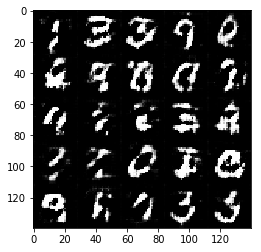

Epoch 0/2 Batch Step 220... Discriminator Loss: 1.4502... Generator Loss: 0.5221
Epoch 0/2 Batch Step 240... Discriminator Loss: 2.1711... Generator Loss: 0.2909
Epoch 0/2 Batch Step 260... Discriminator Loss: 1.6683... Generator Loss: 0.3680
Epoch 0/2 Batch Step 280... Discriminator Loss: 1.4463... Generator Loss: 0.6736
Epoch 0/2 Batch Step 300... Discriminator Loss: 1.4423... Generator Loss: 0.7943
Epoch 0/2 Batch Step 320... Discriminator Loss: 1.5222... Generator Loss: 1.0109
Epoch 0/2 Batch Step 340... Discriminator Loss: 1.2338... Generator Loss: 0.9066
Epoch 0/2 Batch Step 360... Discriminator Loss: 1.7366... Generator Loss: 0.3279
Epoch 0/2 Batch Step 380... Discriminator Loss: 1.7381... Generator Loss: 0.3926
Epoch 0/2 Batch Step 400... Discriminator Loss: 1.3246... Generator Loss: 0.9530


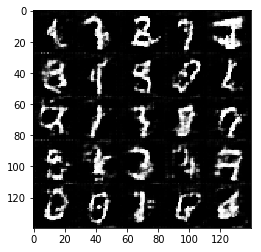

Epoch 0/2 Batch Step 420... Discriminator Loss: 1.3516... Generator Loss: 0.9017
Epoch 0/2 Batch Step 440... Discriminator Loss: 1.1471... Generator Loss: 0.9811
Epoch 0/2 Batch Step 460... Discriminator Loss: 1.7622... Generator Loss: 0.3278
Epoch 0/2 Batch Step 480... Discriminator Loss: 1.5434... Generator Loss: 1.0150
Epoch 0/2 Batch Step 500... Discriminator Loss: 1.4001... Generator Loss: 0.5706
Epoch 0/2 Batch Step 520... Discriminator Loss: 1.2372... Generator Loss: 0.9626
Epoch 0/2 Batch Step 540... Discriminator Loss: 1.2775... Generator Loss: 1.0211
Epoch 0/2 Batch Step 560... Discriminator Loss: 1.3731... Generator Loss: 0.6375
Epoch 0/2 Batch Step 580... Discriminator Loss: 1.4302... Generator Loss: 0.7733
Epoch 0/2 Batch Step 600... Discriminator Loss: 1.5931... Generator Loss: 0.4363


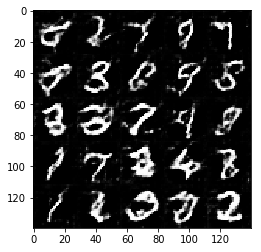

Epoch 0/2 Batch Step 620... Discriminator Loss: 1.2717... Generator Loss: 0.8048
Epoch 0/2 Batch Step 640... Discriminator Loss: 1.7133... Generator Loss: 0.3618
Epoch 0/2 Batch Step 660... Discriminator Loss: 1.2560... Generator Loss: 1.0020
Epoch 0/2 Batch Step 680... Discriminator Loss: 1.6299... Generator Loss: 0.4369
Epoch 0/2 Batch Step 700... Discriminator Loss: 1.4085... Generator Loss: 0.5603
Epoch 0/2 Batch Step 720... Discriminator Loss: 1.3218... Generator Loss: 0.8322
Epoch 0/2 Batch Step 740... Discriminator Loss: 1.1897... Generator Loss: 0.9172
Epoch 0/2 Batch Step 760... Discriminator Loss: 1.3034... Generator Loss: 0.6076
Epoch 0/2 Batch Step 780... Discriminator Loss: 1.6031... Generator Loss: 0.4518
Epoch 0/2 Batch Step 800... Discriminator Loss: 1.3361... Generator Loss: 0.8066


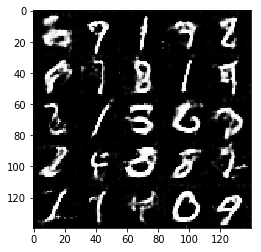

Epoch 0/2 Batch Step 820... Discriminator Loss: 1.1723... Generator Loss: 0.8621
Epoch 0/2 Batch Step 840... Discriminator Loss: 1.2275... Generator Loss: 2.4425
Epoch 0/2 Batch Step 860... Discriminator Loss: 1.7026... Generator Loss: 0.3580
Epoch 0/2 Batch Step 880... Discriminator Loss: 1.3406... Generator Loss: 0.6386
Epoch 0/2 Batch Step 900... Discriminator Loss: 1.1309... Generator Loss: 1.4707
Epoch 0/2 Batch Step 920... Discriminator Loss: 1.1985... Generator Loss: 1.2390
Epoch 1/2 Batch Step 940... Discriminator Loss: 1.1512... Generator Loss: 0.7776
Epoch 1/2 Batch Step 960... Discriminator Loss: 1.5645... Generator Loss: 0.5012
Epoch 1/2 Batch Step 980... Discriminator Loss: 1.4573... Generator Loss: 0.5684
Epoch 1/2 Batch Step 1000... Discriminator Loss: 1.3025... Generator Loss: 0.7159


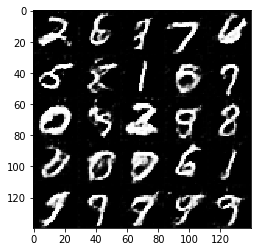

Epoch 1/2 Batch Step 1020... Discriminator Loss: 1.3826... Generator Loss: 0.5742
Epoch 1/2 Batch Step 1040... Discriminator Loss: 1.0543... Generator Loss: 1.1764
Epoch 1/2 Batch Step 1060... Discriminator Loss: 1.3645... Generator Loss: 0.5894
Epoch 1/2 Batch Step 1080... Discriminator Loss: 1.4138... Generator Loss: 0.5634
Epoch 1/2 Batch Step 1100... Discriminator Loss: 0.9719... Generator Loss: 1.0277
Epoch 1/2 Batch Step 1120... Discriminator Loss: 1.2694... Generator Loss: 0.9894
Epoch 1/2 Batch Step 1140... Discriminator Loss: 1.0034... Generator Loss: 1.1782
Epoch 1/2 Batch Step 1160... Discriminator Loss: 1.6103... Generator Loss: 0.3968
Epoch 1/2 Batch Step 1180... Discriminator Loss: 1.2604... Generator Loss: 1.1030
Epoch 1/2 Batch Step 1200... Discriminator Loss: 1.2219... Generator Loss: 0.6950


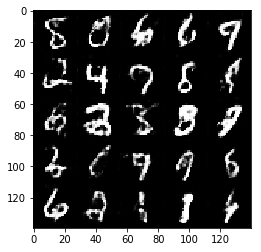

Epoch 1/2 Batch Step 1220... Discriminator Loss: 1.0548... Generator Loss: 1.3654
Epoch 1/2 Batch Step 1240... Discriminator Loss: 0.9858... Generator Loss: 1.0568
Epoch 1/2 Batch Step 1260... Discriminator Loss: 1.0338... Generator Loss: 1.2124
Epoch 1/2 Batch Step 1280... Discriminator Loss: 1.9397... Generator Loss: 0.2920
Epoch 1/2 Batch Step 1300... Discriminator Loss: 2.0229... Generator Loss: 0.2750
Epoch 1/2 Batch Step 1320... Discriminator Loss: 1.3047... Generator Loss: 2.2164
Epoch 1/2 Batch Step 1340... Discriminator Loss: 0.8571... Generator Loss: 1.2587
Epoch 1/2 Batch Step 1360... Discriminator Loss: 1.2494... Generator Loss: 0.7783
Epoch 1/2 Batch Step 1380... Discriminator Loss: 0.8663... Generator Loss: 1.5178
Epoch 1/2 Batch Step 1400... Discriminator Loss: 0.9281... Generator Loss: 1.1956


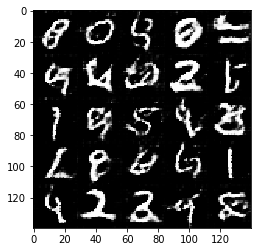

Epoch 1/2 Batch Step 1420... Discriminator Loss: 1.2264... Generator Loss: 1.7842
Epoch 1/2 Batch Step 1440... Discriminator Loss: 0.6721... Generator Loss: 1.7406
Epoch 1/2 Batch Step 1460... Discriminator Loss: 0.9195... Generator Loss: 1.6226
Epoch 1/2 Batch Step 1480... Discriminator Loss: 0.8829... Generator Loss: 1.6122
Epoch 1/2 Batch Step 1500... Discriminator Loss: 0.7516... Generator Loss: 1.4110
Epoch 1/2 Batch Step 1520... Discriminator Loss: 0.9492... Generator Loss: 1.1797
Epoch 1/2 Batch Step 1540... Discriminator Loss: 1.0721... Generator Loss: 1.3782
Epoch 1/2 Batch Step 1560... Discriminator Loss: 1.5855... Generator Loss: 0.4552
Epoch 1/2 Batch Step 1580... Discriminator Loss: 0.7982... Generator Loss: 1.4283
Epoch 1/2 Batch Step 1600... Discriminator Loss: 1.8505... Generator Loss: 0.4583


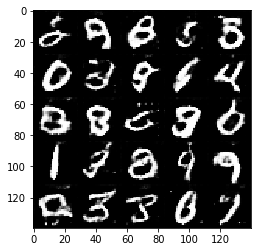

Epoch 1/2 Batch Step 1620... Discriminator Loss: 1.0426... Generator Loss: 1.2570
Epoch 1/2 Batch Step 1640... Discriminator Loss: 0.6334... Generator Loss: 1.7901
Epoch 1/2 Batch Step 1660... Discriminator Loss: 0.8796... Generator Loss: 1.7852
Epoch 1/2 Batch Step 1680... Discriminator Loss: 0.6454... Generator Loss: 1.9477
Epoch 1/2 Batch Step 1700... Discriminator Loss: 1.0732... Generator Loss: 0.8049
Epoch 1/2 Batch Step 1720... Discriminator Loss: 1.1017... Generator Loss: 0.7765
Epoch 1/2 Batch Step 1740... Discriminator Loss: 1.3417... Generator Loss: 2.5610
Epoch 1/2 Batch Step 1760... Discriminator Loss: 0.8083... Generator Loss: 1.2608
Epoch 1/2 Batch Step 1780... Discriminator Loss: 1.6551... Generator Loss: 0.5792
Epoch 1/2 Batch Step 1800... Discriminator Loss: 1.1963... Generator Loss: 0.9357


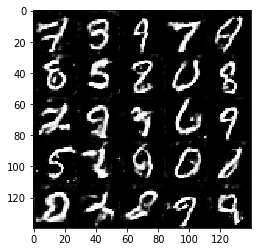

Epoch 1/2 Batch Step 1820... Discriminator Loss: 1.3657... Generator Loss: 0.5630
Epoch 1/2 Batch Step 1840... Discriminator Loss: 1.4451... Generator Loss: 0.5334
Epoch 1/2 Batch Step 1860... Discriminator Loss: 1.1605... Generator Loss: 0.8679
Done Training!


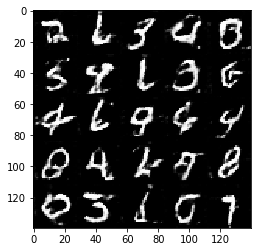

In [184]:
batch_size = 64
z_dim = 512
learning_rate = 0.0042
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1 Batch Step 20... Discriminator Loss: 2.3561... Generator Loss: 0.3209
Epoch 0/1 Batch Step 40... Discriminator Loss: 2.1878... Generator Loss: 0.6762
Epoch 0/1 Batch Step 60... Discriminator Loss: 1.2431... Generator Loss: 2.5710
Epoch 0/1 Batch Step 80... Discriminator Loss: 0.8859... Generator Loss: 1.3915
Epoch 0/1 Batch Step 100... Discriminator Loss: 1.3143... Generator Loss: 0.8815
Epoch 0/1 Batch Step 120... Discriminator Loss: 1.8714... Generator Loss: 2.1175
Epoch 0/1 Batch Step 140... Discriminator Loss: 1.8017... Generator Loss: 0.5133
Epoch 0/1 Batch Step 160... Discriminator Loss: 0.9319... Generator Loss: 1.0220
Epoch 0/1 Batch Step 180... Discriminator Loss: 1.1594... Generator Loss: 0.7681
Epoch 0/1 Batch Step 200... Discriminator Loss: 0.7662... Generator Loss: 1.8350


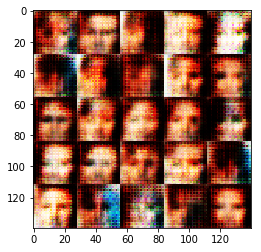

Epoch 0/1 Batch Step 220... Discriminator Loss: 0.5904... Generator Loss: 1.8660
Epoch 0/1 Batch Step 240... Discriminator Loss: 0.8876... Generator Loss: 0.9665
Epoch 0/1 Batch Step 260... Discriminator Loss: 0.6507... Generator Loss: 1.4392
Epoch 0/1 Batch Step 280... Discriminator Loss: 1.4714... Generator Loss: 0.6282
Epoch 0/1 Batch Step 300... Discriminator Loss: 1.4066... Generator Loss: 0.9440
Epoch 0/1 Batch Step 320... Discriminator Loss: 1.7834... Generator Loss: 0.4179
Epoch 0/1 Batch Step 340... Discriminator Loss: 1.6331... Generator Loss: 1.2786
Epoch 0/1 Batch Step 360... Discriminator Loss: 1.4519... Generator Loss: 0.5173
Epoch 0/1 Batch Step 380... Discriminator Loss: 1.5996... Generator Loss: 1.0398
Epoch 0/1 Batch Step 400... Discriminator Loss: 1.5832... Generator Loss: 0.8366


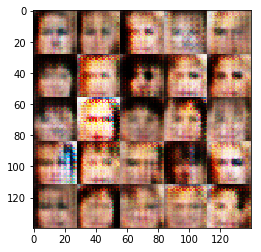

Epoch 0/1 Batch Step 420... Discriminator Loss: 1.2027... Generator Loss: 0.6799
Epoch 0/1 Batch Step 440... Discriminator Loss: 0.8547... Generator Loss: 1.9787
Epoch 0/1 Batch Step 460... Discriminator Loss: 1.8682... Generator Loss: 1.6608
Epoch 0/1 Batch Step 480... Discriminator Loss: 1.0788... Generator Loss: 1.2994
Epoch 0/1 Batch Step 500... Discriminator Loss: 1.3010... Generator Loss: 0.7181
Epoch 0/1 Batch Step 520... Discriminator Loss: 1.1141... Generator Loss: 1.3133
Epoch 0/1 Batch Step 540... Discriminator Loss: 1.0094... Generator Loss: 0.7864
Epoch 0/1 Batch Step 560... Discriminator Loss: 1.3654... Generator Loss: 0.7260
Epoch 0/1 Batch Step 580... Discriminator Loss: 1.3907... Generator Loss: 0.5464
Epoch 0/1 Batch Step 600... Discriminator Loss: 1.8991... Generator Loss: 0.4657


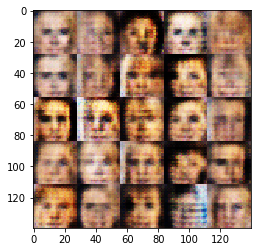

Epoch 0/1 Batch Step 620... Discriminator Loss: 1.1000... Generator Loss: 1.5270
Epoch 0/1 Batch Step 640... Discriminator Loss: 1.5709... Generator Loss: 1.1253
Epoch 0/1 Batch Step 660... Discriminator Loss: 1.5051... Generator Loss: 0.9740
Epoch 0/1 Batch Step 680... Discriminator Loss: 1.4339... Generator Loss: 0.6265
Epoch 0/1 Batch Step 700... Discriminator Loss: 1.5407... Generator Loss: 0.6733
Epoch 0/1 Batch Step 720... Discriminator Loss: 1.3093... Generator Loss: 0.6386
Epoch 0/1 Batch Step 740... Discriminator Loss: 1.2123... Generator Loss: 1.0413
Epoch 0/1 Batch Step 760... Discriminator Loss: 1.6698... Generator Loss: 0.8093
Epoch 0/1 Batch Step 780... Discriminator Loss: 1.4753... Generator Loss: 0.9441
Epoch 0/1 Batch Step 800... Discriminator Loss: 1.5988... Generator Loss: 0.4496


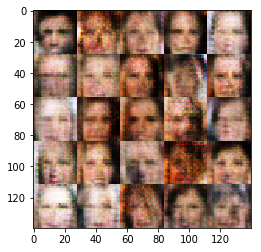

Epoch 0/1 Batch Step 820... Discriminator Loss: 1.2357... Generator Loss: 0.8093
Epoch 0/1 Batch Step 840... Discriminator Loss: 1.2234... Generator Loss: 0.7315
Epoch 0/1 Batch Step 860... Discriminator Loss: 1.2219... Generator Loss: 0.7088
Epoch 0/1 Batch Step 880... Discriminator Loss: 1.1954... Generator Loss: 0.6888
Epoch 0/1 Batch Step 900... Discriminator Loss: 1.4157... Generator Loss: 0.9416
Epoch 0/1 Batch Step 920... Discriminator Loss: 1.1931... Generator Loss: 1.3983
Epoch 0/1 Batch Step 940... Discriminator Loss: 1.3904... Generator Loss: 0.9448
Epoch 0/1 Batch Step 960... Discriminator Loss: 0.8203... Generator Loss: 1.2007
Epoch 0/1 Batch Step 980... Discriminator Loss: 1.5766... Generator Loss: 0.4508
Epoch 0/1 Batch Step 1000... Discriminator Loss: 1.5600... Generator Loss: 0.5077


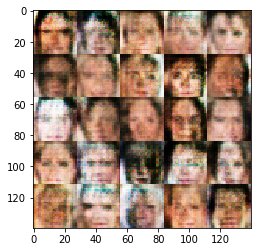

Epoch 0/1 Batch Step 1020... Discriminator Loss: 1.6480... Generator Loss: 0.4433
Epoch 0/1 Batch Step 1040... Discriminator Loss: 1.3781... Generator Loss: 0.5459
Epoch 0/1 Batch Step 1060... Discriminator Loss: 1.5542... Generator Loss: 0.5587
Epoch 0/1 Batch Step 1080... Discriminator Loss: 1.4137... Generator Loss: 0.6633
Epoch 0/1 Batch Step 1100... Discriminator Loss: 1.4506... Generator Loss: 0.6272
Epoch 0/1 Batch Step 1120... Discriminator Loss: 1.4277... Generator Loss: 0.8567
Epoch 0/1 Batch Step 1140... Discriminator Loss: 1.2731... Generator Loss: 0.7724
Epoch 0/1 Batch Step 1160... Discriminator Loss: 2.4467... Generator Loss: 0.1619
Epoch 0/1 Batch Step 1180... Discriminator Loss: 0.9739... Generator Loss: 0.9151
Epoch 0/1 Batch Step 1200... Discriminator Loss: 1.2438... Generator Loss: 0.7033


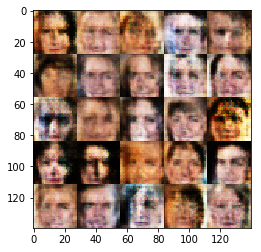

Epoch 0/1 Batch Step 1220... Discriminator Loss: 1.6884... Generator Loss: 0.3892
Epoch 0/1 Batch Step 1240... Discriminator Loss: 0.9477... Generator Loss: 1.5020
Epoch 0/1 Batch Step 1260... Discriminator Loss: 1.2805... Generator Loss: 1.1607
Epoch 0/1 Batch Step 1280... Discriminator Loss: 1.2382... Generator Loss: 0.8395
Epoch 0/1 Batch Step 1300... Discriminator Loss: 1.4745... Generator Loss: 0.9231
Epoch 0/1 Batch Step 1320... Discriminator Loss: 1.3953... Generator Loss: 0.8144
Epoch 0/1 Batch Step 1340... Discriminator Loss: 1.6424... Generator Loss: 0.5959
Epoch 0/1 Batch Step 1360... Discriminator Loss: 1.4820... Generator Loss: 1.1005
Epoch 0/1 Batch Step 1380... Discriminator Loss: 1.4235... Generator Loss: 0.5311
Epoch 0/1 Batch Step 1400... Discriminator Loss: 1.5360... Generator Loss: 0.6116


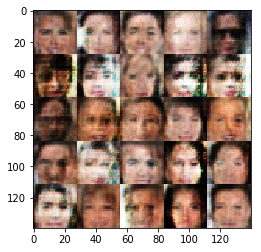

Epoch 0/1 Batch Step 1420... Discriminator Loss: 1.4404... Generator Loss: 0.8291
Epoch 0/1 Batch Step 1440... Discriminator Loss: 1.6288... Generator Loss: 0.4976
Epoch 0/1 Batch Step 1460... Discriminator Loss: 1.5922... Generator Loss: 1.4091
Epoch 0/1 Batch Step 1480... Discriminator Loss: 1.3360... Generator Loss: 0.6477
Epoch 0/1 Batch Step 1500... Discriminator Loss: 1.4537... Generator Loss: 0.9217
Epoch 0/1 Batch Step 1520... Discriminator Loss: 1.9746... Generator Loss: 1.0228
Epoch 0/1 Batch Step 1540... Discriminator Loss: 1.4588... Generator Loss: 0.7302
Epoch 0/1 Batch Step 1560... Discriminator Loss: 1.2975... Generator Loss: 0.7092
Epoch 0/1 Batch Step 1580... Discriminator Loss: 1.4719... Generator Loss: 1.0394
Epoch 0/1 Batch Step 1600... Discriminator Loss: 1.4095... Generator Loss: 0.6885


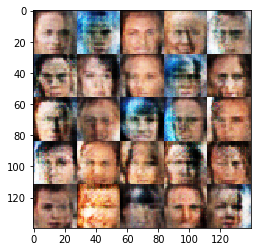

Epoch 0/1 Batch Step 1620... Discriminator Loss: 1.4238... Generator Loss: 0.6157
Epoch 0/1 Batch Step 1640... Discriminator Loss: 1.4901... Generator Loss: 0.7053
Epoch 0/1 Batch Step 1660... Discriminator Loss: 1.4223... Generator Loss: 0.6758
Epoch 0/1 Batch Step 1680... Discriminator Loss: 2.1891... Generator Loss: 0.2073
Epoch 0/1 Batch Step 1700... Discriminator Loss: 1.5341... Generator Loss: 1.0281
Epoch 0/1 Batch Step 1720... Discriminator Loss: 1.5598... Generator Loss: 0.5603
Epoch 0/1 Batch Step 1740... Discriminator Loss: 1.6309... Generator Loss: 0.4052
Epoch 0/1 Batch Step 1760... Discriminator Loss: 1.3450... Generator Loss: 1.1197
Epoch 0/1 Batch Step 1780... Discriminator Loss: 1.2855... Generator Loss: 0.5276
Epoch 0/1 Batch Step 1800... Discriminator Loss: 1.9993... Generator Loss: 0.2386


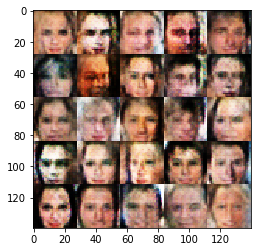

Epoch 0/1 Batch Step 1820... Discriminator Loss: 1.4499... Generator Loss: 1.4518
Epoch 0/1 Batch Step 1840... Discriminator Loss: 0.9586... Generator Loss: 1.0642
Epoch 0/1 Batch Step 1860... Discriminator Loss: 1.5245... Generator Loss: 0.6595
Epoch 0/1 Batch Step 1880... Discriminator Loss: 1.4333... Generator Loss: 0.5810
Epoch 0/1 Batch Step 1900... Discriminator Loss: 1.7738... Generator Loss: 0.5001
Epoch 0/1 Batch Step 1920... Discriminator Loss: 1.3665... Generator Loss: 0.6183
Epoch 0/1 Batch Step 1940... Discriminator Loss: 1.6754... Generator Loss: 0.4389
Epoch 0/1 Batch Step 1960... Discriminator Loss: 1.2172... Generator Loss: 1.0260
Epoch 0/1 Batch Step 1980... Discriminator Loss: 1.4071... Generator Loss: 0.8015
Epoch 0/1 Batch Step 2000... Discriminator Loss: 1.5265... Generator Loss: 0.4716


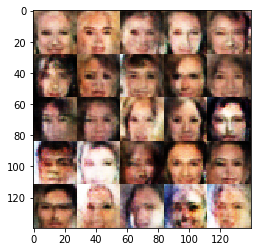

Epoch 0/1 Batch Step 2020... Discriminator Loss: 1.2010... Generator Loss: 0.7097
Epoch 0/1 Batch Step 2040... Discriminator Loss: 1.7299... Generator Loss: 0.4843
Epoch 0/1 Batch Step 2060... Discriminator Loss: 1.7180... Generator Loss: 0.5015
Epoch 0/1 Batch Step 2080... Discriminator Loss: 1.2741... Generator Loss: 0.8401
Epoch 0/1 Batch Step 2100... Discriminator Loss: 1.4774... Generator Loss: 0.7854
Epoch 0/1 Batch Step 2120... Discriminator Loss: 1.7462... Generator Loss: 0.3506
Epoch 0/1 Batch Step 2140... Discriminator Loss: 1.5232... Generator Loss: 0.6134
Epoch 0/1 Batch Step 2160... Discriminator Loss: 1.5014... Generator Loss: 0.4285
Epoch 0/1 Batch Step 2180... Discriminator Loss: 1.1579... Generator Loss: 0.8993
Epoch 0/1 Batch Step 2200... Discriminator Loss: 1.5428... Generator Loss: 0.5675


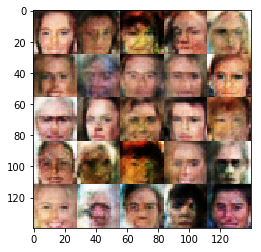

Epoch 0/1 Batch Step 2220... Discriminator Loss: 1.6440... Generator Loss: 0.4584
Epoch 0/1 Batch Step 2240... Discriminator Loss: 1.3302... Generator Loss: 0.7149
Epoch 0/1 Batch Step 2260... Discriminator Loss: 0.9497... Generator Loss: 1.7959
Epoch 0/1 Batch Step 2280... Discriminator Loss: 1.5579... Generator Loss: 0.7514
Epoch 0/1 Batch Step 2300... Discriminator Loss: 1.4431... Generator Loss: 1.0345
Epoch 0/1 Batch Step 2320... Discriminator Loss: 1.5167... Generator Loss: 0.7181
Epoch 0/1 Batch Step 2340... Discriminator Loss: 1.9164... Generator Loss: 0.2910
Epoch 0/1 Batch Step 2360... Discriminator Loss: 1.8187... Generator Loss: 0.4598
Epoch 0/1 Batch Step 2380... Discriminator Loss: 1.6302... Generator Loss: 0.4276
Epoch 0/1 Batch Step 2400... Discriminator Loss: 1.5445... Generator Loss: 0.5527


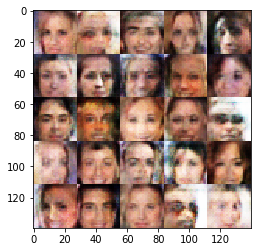

Epoch 0/1 Batch Step 2420... Discriminator Loss: 1.5748... Generator Loss: 0.6651
Epoch 0/1 Batch Step 2440... Discriminator Loss: 1.2862... Generator Loss: 0.8663
Epoch 0/1 Batch Step 2460... Discriminator Loss: 1.5473... Generator Loss: 0.6182
Epoch 0/1 Batch Step 2480... Discriminator Loss: 1.3318... Generator Loss: 0.7856
Epoch 0/1 Batch Step 2500... Discriminator Loss: 1.5449... Generator Loss: 0.5470
Epoch 0/1 Batch Step 2520... Discriminator Loss: 1.4916... Generator Loss: 0.7277
Epoch 0/1 Batch Step 2540... Discriminator Loss: 1.4001... Generator Loss: 0.5368
Epoch 0/1 Batch Step 2560... Discriminator Loss: 1.5062... Generator Loss: 0.5621
Epoch 0/1 Batch Step 2580... Discriminator Loss: 1.6795... Generator Loss: 0.4104
Epoch 0/1 Batch Step 2600... Discriminator Loss: 1.2766... Generator Loss: 0.6440


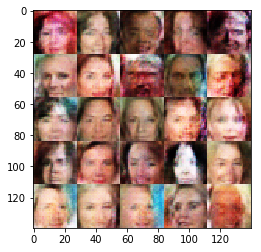

Epoch 0/1 Batch Step 2620... Discriminator Loss: 1.3851... Generator Loss: 0.8034
Epoch 0/1 Batch Step 2640... Discriminator Loss: 1.4496... Generator Loss: 0.7926
Epoch 0/1 Batch Step 2660... Discriminator Loss: 1.5065... Generator Loss: 0.8712
Epoch 0/1 Batch Step 2680... Discriminator Loss: 1.4131... Generator Loss: 0.7401
Epoch 0/1 Batch Step 2700... Discriminator Loss: 1.5289... Generator Loss: 0.5060
Epoch 0/1 Batch Step 2720... Discriminator Loss: 1.5692... Generator Loss: 0.7526
Epoch 0/1 Batch Step 2740... Discriminator Loss: 1.5086... Generator Loss: 0.6392
Epoch 0/1 Batch Step 2760... Discriminator Loss: 1.5277... Generator Loss: 0.4667
Epoch 0/1 Batch Step 2780... Discriminator Loss: 1.1952... Generator Loss: 1.1126
Epoch 0/1 Batch Step 2800... Discriminator Loss: 1.5610... Generator Loss: 0.6000


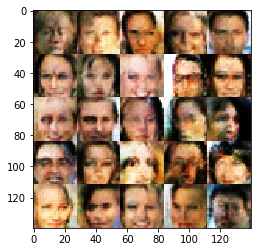

Epoch 0/1 Batch Step 2820... Discriminator Loss: 1.5038... Generator Loss: 0.5554
Epoch 0/1 Batch Step 2840... Discriminator Loss: 1.6238... Generator Loss: 0.5775
Epoch 0/1 Batch Step 2860... Discriminator Loss: 1.5603... Generator Loss: 0.5149
Epoch 0/1 Batch Step 2880... Discriminator Loss: 1.4993... Generator Loss: 0.5400
Epoch 0/1 Batch Step 2900... Discriminator Loss: 1.6415... Generator Loss: 0.4208
Epoch 0/1 Batch Step 2920... Discriminator Loss: 1.5397... Generator Loss: 0.7084
Epoch 0/1 Batch Step 2940... Discriminator Loss: 1.6085... Generator Loss: 1.0853
Epoch 0/1 Batch Step 2960... Discriminator Loss: 1.5729... Generator Loss: 0.5017
Epoch 0/1 Batch Step 2980... Discriminator Loss: 1.6261... Generator Loss: 0.6734
Epoch 0/1 Batch Step 3000... Discriminator Loss: 1.6356... Generator Loss: 0.3823


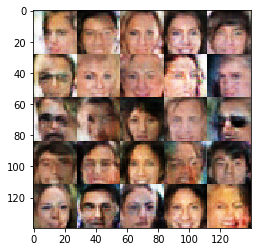

Epoch 0/1 Batch Step 3020... Discriminator Loss: 1.6038... Generator Loss: 0.4627
Epoch 0/1 Batch Step 3040... Discriminator Loss: 1.5939... Generator Loss: 0.4789
Epoch 0/1 Batch Step 3060... Discriminator Loss: 1.6481... Generator Loss: 0.5086
Epoch 0/1 Batch Step 3080... Discriminator Loss: 1.5895... Generator Loss: 0.3727
Epoch 0/1 Batch Step 3100... Discriminator Loss: 0.4794... Generator Loss: 3.1803
Epoch 0/1 Batch Step 3120... Discriminator Loss: 1.8082... Generator Loss: 0.3312
Epoch 0/1 Batch Step 3140... Discriminator Loss: 1.5409... Generator Loss: 0.5900
Epoch 0/1 Batch Step 3160... Discriminator Loss: 1.6417... Generator Loss: 0.4346
Done Training!


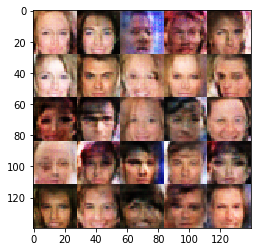

In [185]:
batch_size = 64
z_dim = 1024
learning_rate = 0.002
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.

#### References
Implementation and tuning of both discriminator and generator of this project has referenced several discussion discussion threads and previous works including:
- https://discussions.udacity.com/t/all-tests-passed-but-generator-loss-is-not-improving/248040
- https://discussions.udacity.com/t/weird-generator-loss/248328
- https://discussions.udacity.com/t/adding-batch-normalization-to-discriminator-leads-to-high-generator-loss/496084/8
- https://discussions.udacity.com/t/generator-loss-seems-high/316453
- https://gist.github.com/greg-ashby/3489d1bae59b953ec43bae81880036ea
- http://www.alivelearn.net/deeplearning/dlnd_face_generation.html
- http://www.danag.co/dlnd_face_generation.html
- http://www.sai-tai.com/demos/dl/face-generation.html